In [165]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

# 1. Data Loading and Preprocessing:
Download the CIFAR-10 dataset if not already available.Normalize the pixel values to be between 0 and 1.

In [166]:
# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [167]:
#Getting the Min and Max to find the range of the given images.
train_images.min(),train_images.max()

(0, 255)

In [168]:
#Normalizing the Images and setting the range b/w 0 and 1.
train_images = train_images/255
test_images = test_images/255

In [169]:
#Cross checking the normalized data.
test_images.min(),test_images.max()

(0.0, 1.0)

# 2.Building a BaseLine CNN Model.

In [170]:
#Defining baseline CNN Model.
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape = (32,32,3)))
#([32*3*3*3+32])Number Of Parameters.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
#(64*3*3*3+64)Number Of Parameters.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
#(2304*128+128)Number Of Parameters.
model.add(Dense(10,activation="softmax"))

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [171]:
#Compiling the Model with Necessary metrics.
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [172]:
#Training the Model With the Hyperparameters.
history = model.fit(train_images,train_labels,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 58s 46ms/step - loss: 1.5145 - accuracy: 0.4535 - val_loss: 1.2847 - val_accuracy: 0.5486
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.1630 - accuracy: 0.5906 - val_loss: 1.1357 - val_accuracy: 0.5999
Epoch 3/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.0280 - accuracy: 0.6396 - val_loss: 1.0457 - val_accuracy: 0.6384
Epoch 4/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.9270 - accuracy: 0.6760 - val_loss: 0.9864 - val_accuracy: 0.6622
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.8525 - accuracy: 0.7033 - val_loss: 0.9958 - val_accuracy: 0.6547
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.7900 - accuracy: 0.7245 - val_loss: 0.9617 - val_accuracy: 0.6685
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.7317 - accuracy: 0.7441 - val_loss: 0.9716 -

In [173]:
#Evaluating the baseline models test accuracy and loss.
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=0)
print(test_loss,test_acc)

1.010846495628357 0.6747999787330627


In [174]:
#Saving the Model.
model.save('Cifar-10(Assigment-4).h5')

In [175]:
#Added to avoid Kernel crash.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

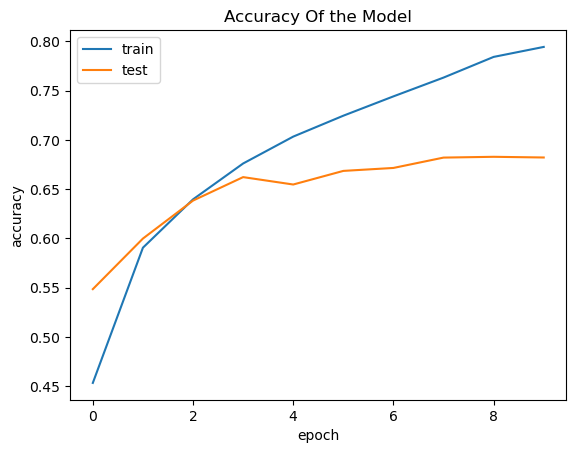

In [176]:
#Plot visualizations for training and validation accuracy and loss over epochs.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Of the Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

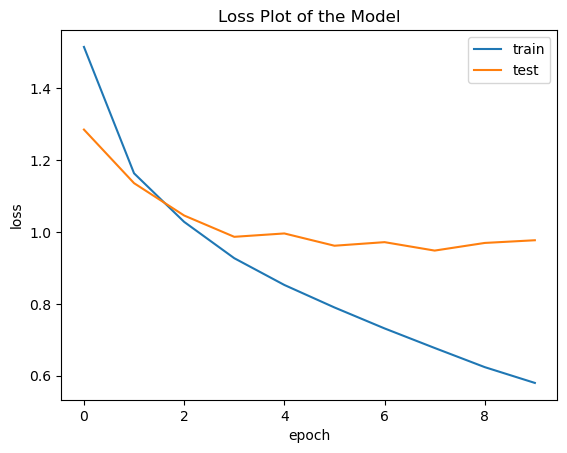

In [177]:
#Loss plot for the trained and test data.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Plot of the Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
#Observations from the above plot.

#Model is overfitting as the number of epochs increases.It means the graphs is indicating that the training accuracy is
#increasing but the test accuracy is not performing better.It is Caused due the model learning the exact features of the
#training data.These overfitting of data is overcomed by data augmentation.

#Loss plot shows that as the number of epochs are increased the loss on training data is getting decreased,but the loss 
#Comparatively for the testing data is getting high.Which means the model is overfitting with the training data.

In [179]:
#Testing or validating the trained model on the test data.
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [180]:
#Confusion Matrix for the Trained model in predicting the test data.
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(np.argmax(predictions,axis=1),test_labels))

[[767  44  50  22  29  15   6  25  95  52]
 [ 14 743   5  11   5   2   4   2  24  53]
 [ 80  27 685 169 169 127  96  87  42  32]
 [  4   9  38 426  52 148  44  22  12  11]
 [ 10   7  58  56 508  33  23  43   4   6]
 [  6   6  59 162  42 565  25  71   7  12]
 [  7  10  61  82  96  41 786  13  13   9]
 [ 19   3  31  44  86  57   6 722   7  15]
 [ 58  34   8  13   9   5   4   2 762  26]
 [ 35 117   5  15   4   7   6  13  34 784]]


In [181]:
#Classification report for the Trained model in predicting the test data.
print(classification_report(np.argmax(predictions,axis=1),test_labels))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1105
           1       0.74      0.86      0.80       863
           2       0.69      0.45      0.54      1514
           3       0.43      0.56      0.48       766
           4       0.51      0.68      0.58       748
           5       0.56      0.59      0.58       955
           6       0.79      0.70      0.74      1118
           7       0.72      0.73      0.73       990
           8       0.76      0.83      0.79       921
           9       0.78      0.77      0.78      1020

    accuracy                           0.67     10000
   macro avg       0.67      0.69      0.68     10000
weighted avg       0.69      0.67      0.67     10000



In [145]:
#Load the Necessary Libraries..
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
import cv2

In [146]:
# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [147]:
#Printing the shape of the train_images and train_labels.
train_images.shape,train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [148]:
#Printing the shape of the test_images and test_labels.
test_images.shape,test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [36]:
#Creating the directories and sub-directories for storing the training and testing images based on their class_names.
if not os.path.exists("cifar-10-data"):
    os.mkdir("cifar-10-data")
    
train_path = os.path.join("cifar-10-data","train")
test_path = os.path.join("cifar-10-data","test")

if not os.path.isdir(train_path):
    os.mkdir(train_path)

if not os.path.isdir(test_path):
    os.mkdir(test_path)
    
li=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for l in li:
    os.mkdir(os.path.join(train_path,l))
    os.mkdir(os.path.join(test_path,l))
    

In [37]:
#Storing each image in the respective directories.
for i in range(50000):
    fname="img-"+str(i)+".jpg"
    cv2.imwrite(os.path.join(train_path,li[train_labels[i][0]],fname),train_images[i])

In [38]:
#Storing each image in the respective directories.
for i in range(10000):
    fname="img-"+str(i)+".jpg"
    cv2.imwrite(os.path.join(test_path,li[test_labels[i][0]],fname),test_images[i])

# 3. Implement data augmentation using the Keras ImageDataGenerator:

In [149]:
#Creating a Datagen object with the necessary parameters for train and validation data.
datagen = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    shear_range=0.05,
    fill_mode="nearest",
    validation_split=0.20
)

In [150]:
#Creating datagen object with necessary parameters for the .
test_datagen = ImageDataGenerator(rescale=1/255)

In [152]:
#Creating the train datagen object.
batch_size = 64

train_generator = datagen.flow_from_directory(
    directory=train_path,
    target_size=(28,28),
    color_mode="grayscale",
    batch_size=batch_size,
    subset="training",
    shuffle=True,
    seed=97
)

Found 40000 images belonging to 10 classes.


In [153]:
#Creating the train datagen object.
valid_generator = datagen.flow_from_directory(
    directory=train_path,
    target_size=(28,28),
    color_mode="grayscale",
    batch_size=batch_size,
    subset="validation",
    shuffle=True,
    seed=97
)

Found 10000 images belonging to 10 classes.


In [154]:
#Creating the test data.
test_generator = datagen.flow_from_directory(
    directory=test_path,
    target_size=(28,28),
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

Found 10000 images belonging to 10 classes.


# 4. Augmented CNN Model:

In [184]:
#Defining the Augmented model..
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,(3,3),activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(10,activation="softmax"))

In [185]:
#Compiling the model with necessary parameters.
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [186]:
#Summary about the parameters.
print(model1.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [187]:
#Training the model with the hyper parameters.
history1 = model1.fit(train_generator,
           validation_data=valid_generator,
           steps_per_epoch=train_generator.n//train_generator.batch_size,
           validation_steps=valid_generator.n//valid_generator.batch_size,
           epochs=70
          )

Epoch 1/70
625/625 [==============================] - 57s 89ms/step - loss: 1.8726 - accuracy: 0.3195 - val_loss: 1.6131 - val_accuracy: 0.4212
Epoch 2/70
625/625 [==============================] - 50s 80ms/step - loss: 1.5852 - accuracy: 0.4344 - val_loss: 1.4701 - val_accuracy: 0.4766
Epoch 3/70
625/625 [==============================] - 52s 82ms/step - loss: 1.4646 - accuracy: 0.4816 - val_loss: 1.3707 - val_accuracy: 0.5167
Epoch 4/70
625/625 [==============================] - 51s 81ms/step - loss: 1.3937 - accuracy: 0.5068 - val_loss: 1.3239 - val_accuracy: 0.5409
Epoch 5/70
625/625 [==============================] - 56s 90ms/step - loss: 1.3374 - accuracy: 0.5315 - val_loss: 1.2591 - val_accuracy: 0.5588
Epoch 6/70
625/625 [==============================] - 52s 83ms/step - loss: 1.3035 - accuracy: 0.5396 - val_loss: 1.2260 - val_accuracy: 0.5761
Epoch 7/70
625/625 [==============================] - 54s 86ms/step - loss: 1.2686 - accuracy: 0.5548 - val_loss: 1.2116 - val_accuracy:

625/625 [==============================] - 104s 166ms/step - loss: 0.8538 - accuracy: 0.7010 - val_loss: 0.9258 - val_accuracy: 0.6823
Epoch 58/70
625/625 [==============================] - 105s 168ms/step - loss: 0.8410 - accuracy: 0.7059 - val_loss: 0.9153 - val_accuracy: 0.6882
Epoch 59/70
625/625 [==============================] - 104s 167ms/step - loss: 0.8360 - accuracy: 0.7073 - val_loss: 0.9284 - val_accuracy: 0.6882
Epoch 60/70
625/625 [==============================] - 104s 167ms/step - loss: 0.8397 - accuracy: 0.7070 - val_loss: 0.9248 - val_accuracy: 0.6839
Epoch 61/70
625/625 [==============================] - 104s 166ms/step - loss: 0.8382 - accuracy: 0.7067 - val_loss: 0.9508 - val_accuracy: 0.6769
Epoch 62/70
625/625 [==============================] - 105s 167ms/step - loss: 0.8364 - accuracy: 0.7071 - val_loss: 0.9157 - val_accuracy: 0.6889
Epoch 63/70
625/625 [==============================] - 106s 169ms/step - loss: 0.8334 - accuracy: 0.7117 - val_loss: 0.9238 - val_

In [188]:
#Evaluating the Model with the test data.
score = model1.evaluate(test_generator)
print("Test loss:",score[0])

print("Test accuracy:",score[1])

157/157 [==============================] - 22s 139ms/step - loss: 0.8955 - accuracy: 0.6950
Test loss: 0.8955338597297668
Test accuracy: 0.6949999928474426


In [189]:
#Saving the Model.
model1.save("Cifar-10DACNN.h5")

In [190]:
#Predicting the Trained model against the test data.
predict = model1.predict(test_generator)
y_pred=predict.argmax(axis=1)

157/157 [==============================] - 21s 132ms/step


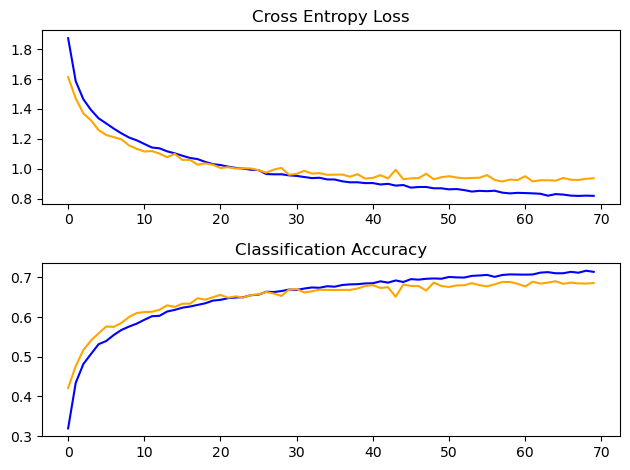

In [191]:
#Plot for the Training and test Accuracy and loss per each epoch.
histories = list()
histories.append(history1)
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(histories[0].history['loss'], color='blue', label='train')
plt.plot(histories[0].history['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(histories[0].history['accuracy'], color='blue', label='train')
plt.plot(histories[0].history['val_accuracy'], color='orange', label='test')

plt.tight_layout()
plt.show()


In [ ]:
#Observations from the Above Pictures.
#Both the training and testing data are performing better and they are approching to converge in few iterations.
#From the picture we can say that the model is learning and performing better on training and testing data respectively.
#As the training accuracy increases the testing accuracy also increased parallely.This improvement of the testing and training 
#accuracies is caused due to the Data Augmentation which helped to extra the multiple features from the transformations.

#Loss is also getting minimized over the training and testing accuracies.As the plot shows that the training and testing losses
#also getting minimized from the graph.

In [194]:
test_generatorerator.classes.shape,y_pred.shape

((10000,), (10000,))

In [192]:
#Metrics for the model with the testing data.
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_generator.classes, y_pred))


[[ 71 117  64  90 121  95 124  96 128  94]
 [ 80  90  98  83 121  80 105 115 118 110]
 [ 95  96  98  88 110 119 110  83 108  93]
 [ 79  95  89  98  99  93 128 102 121  96]
 [ 85  97  99  92 120 104 126  87 107  83]
 [ 79  96  80  85 115  92 105  99 130 119]
 [ 94 104  87  91 119  94  93 101 125  92]
 [ 86 100  77  92 116  94 109 102 122 102]
 [ 68 116  92  99 110  69 114 107 130  95]
 [ 98 108  85  92 109  83 117  91 127  90]]


In [193]:
print(classification_report(test_generator.classes, y_pred))


              precision    recall  f1-score   support

           0       0.09      0.07      0.08      1000
           1       0.09      0.09      0.09      1000
           2       0.11      0.10      0.10      1000
           3       0.11      0.10      0.10      1000
           4       0.11      0.12      0.11      1000
           5       0.10      0.09      0.10      1000
           6       0.08      0.09      0.09      1000
           7       0.10      0.10      0.10      1000
           8       0.11      0.13      0.12      1000
           9       0.09      0.09      0.09      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



In [ ]:
# train_datagen_load = datagen.flow(train_images,train_labels,batch_size=64)
# valid_datagen_load = datagen.flow(train_images,train_labels,batch_size=64)
# history2 = model1.fit(train_datagen_load
# validation_data=valid_generator,
#            steps_per_epoch=train_datagen_load.n//train_datagen_load.batch_size,
#            validation_steps=valid_datagen_load.n//valid_datagen_load.batch_size,
#            epochs=70
#           )
#This Code is for loading the augmented data directly from the training images.

# 7. Data Augmentation Visualization

In [127]:
#Taking the sample images of the plane from the stored folder..
path = os.path.join("cifar-10-data","train","airplane")

In [128]:
#Taking 4 images from the stored Folder.
images = []
count = 0
for image_path in os.listdir(path):
    print(os.path.join(path, image_path))
    try:           
        img = cv2.imread(os.path.join(path, image_path)) # read image file
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (200, 200))  # Resize to 200x200
        images.append(img)
        
        count += 1
        if count >=4: break
    except Exception as e:
        pass

cifar-10-data\train\airplane\img-10008.jpg
cifar-10-data\train\airplane\img-10010.jpg
cifar-10-data\train\airplane\img-10020.jpg
cifar-10-data\train\airplane\img-10024.jpg


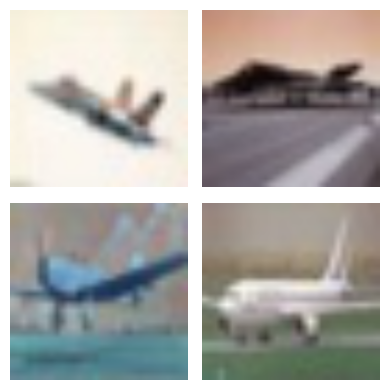

In [129]:
#Plotting the 4 images which are fetched from the path.
plt.figure(figsize=(4, 4))
for i, image in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [130]:
#Converting the pixels into numpy arrays.
images_array = np.array(images)
print(images_array.shape)

(4, 200, 200, 3)


In [135]:
#Creating a sample Datagen Object with the given features in the assignment.
datagen1 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode="nearest"
)

In [136]:
#Performing the data augmentation for the images..
augmented_images = []
num_augmentations = 4

for img in images_array:
    img_batch = np.expand_dims(img, axis=0)
    augmented_batch = datagen1.flow(img_batch, batch_size=1)
    for _ in range(num_augmentations):
        augmented_image = augmented_batch.next()[0].astype(np.uint8)
        augmented_images.append(augmented_image)
len(augmented_images)

16

In [137]:
#Storing the images in the Folder.
output_folder = 'AugmentedImages'
os.makedirs(output_folder, exist_ok=True)

for i, augmented_image in enumerate(augmented_images):
    output_path = os.path.join(output_folder, f'augmented_image_{i}.jpg')
    cv2.imwrite(output_path, augmented_image)

print(f'{len(augmented_images)} augmented images saved to {output_folder}')

16 augmented images saved to AugmentedImages


In [138]:
#Extracting the stored images and then adding them to a list.
path = os.path.join("AugmentedImages")
images = []
count = 0
for image_path in os.listdir(path):
    print(os.path.join(path, image_path))
    try:           
        img = cv2.imread(os.path.join(path, image_path)) # read image file
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (200, 200))  # Resize to 200x200
        images.append(img)
        
        count += 1
        if count >=16: break
    except Exception as e:
        pass

AugmentedImages\augmented_image_0.jpg
AugmentedImages\augmented_image_1.jpg
AugmentedImages\augmented_image_10.jpg
AugmentedImages\augmented_image_11.jpg
AugmentedImages\augmented_image_12.jpg
AugmentedImages\augmented_image_13.jpg
AugmentedImages\augmented_image_14.jpg
AugmentedImages\augmented_image_15.jpg
AugmentedImages\augmented_image_2.jpg
AugmentedImages\augmented_image_3.jpg
AugmentedImages\augmented_image_4.jpg
AugmentedImages\augmented_image_5.jpg
AugmentedImages\augmented_image_6.jpg
AugmentedImages\augmented_image_7.jpg
AugmentedImages\augmented_image_8.jpg
AugmentedImages\augmented_image_9.jpg


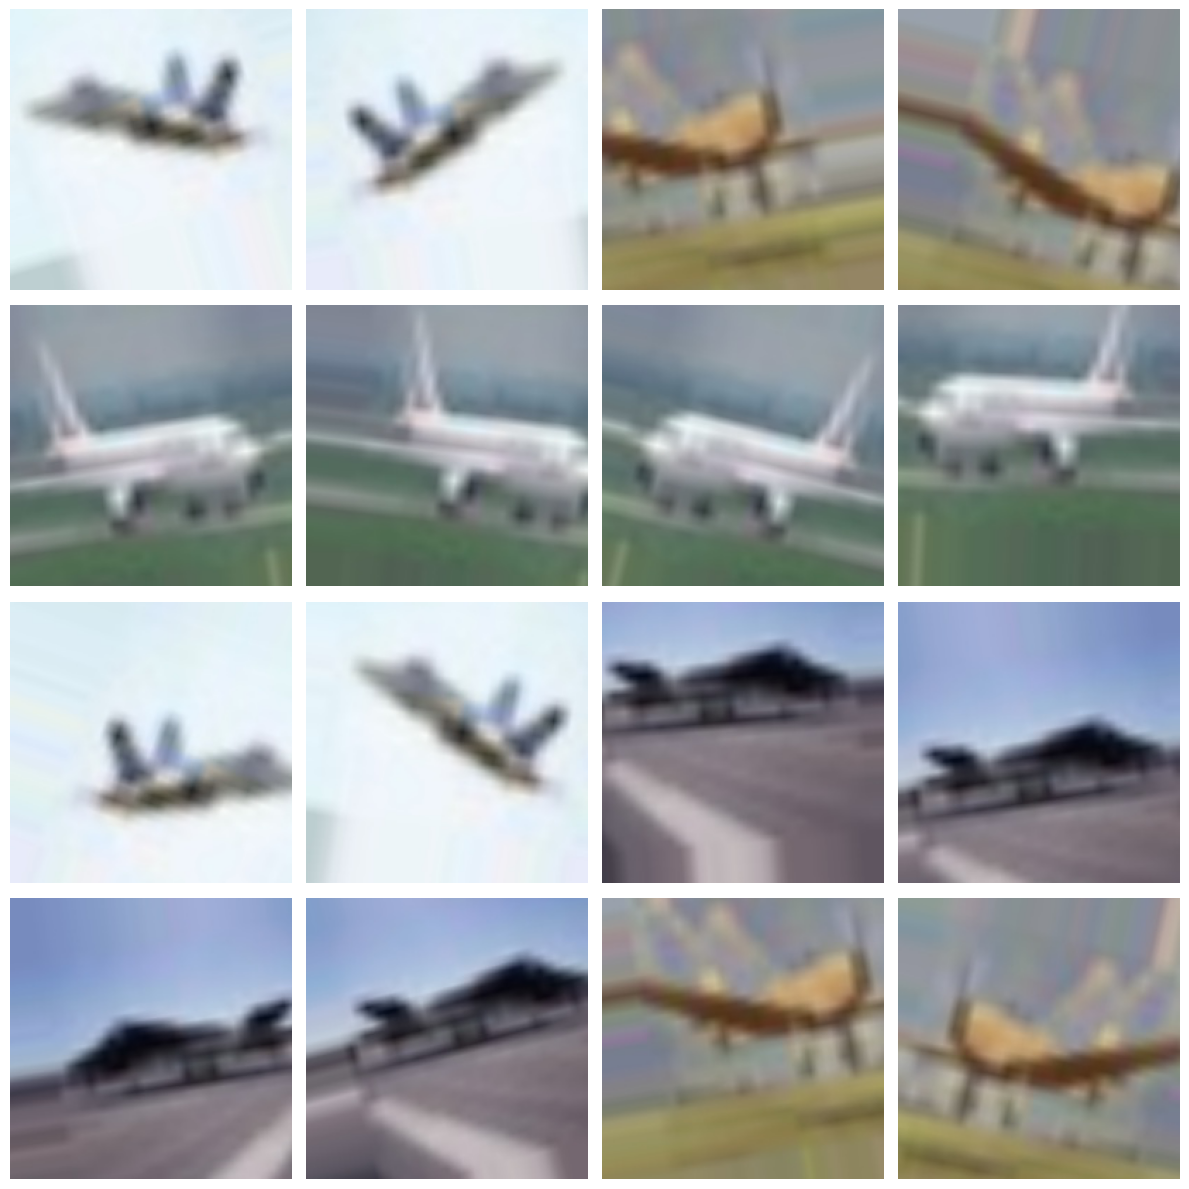

In [139]:
#plotting the augmented images.
plt.figure(figsize=(12, 12))
for i, image in enumerate(images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8. Discussion:
• Summarize your findings and compare the performance of the baseline and augmented models.
• Reflect on the benefits and challenges of using data augmentation in training CNN models.

In [ ]:
#Data Augmentation increases the diversity in the training data by transformations like rotating the image,fliping etc..
#Which helps to robust on the future coming datas.

#Mitigates overfitting by providing the more training samples by augmenting the data which will less likely make the model
#memorize the data and instead learn the generalizable features.

#Enhanced Training Efficiency as the Augmented datasets can be generated on-the-fly, reducing the need to store a large 
#amount of preprocessed data. This can save storage and memory resources.

#Better Model Performance than baseline model trained with data augmentation often achieve better accuracy on test data compared to 
#models trained without augmentation.

#Challenges Takes More Computational/training time to train the data as the number of images increased.

#tuning hyperparameters by the trial and error method.

#Domain Specific challenges like in medical field it may lead to change of decisions.